In [24]:
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt  

In [25]:
#load dataset
df_original= pd.read_csv('classification_2.csv')

In [26]:
df = df_original
# show top 5 rows of dataset
df.head()


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [27]:
df.columns = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"]
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [28]:
# df.isnull().sum()

In [29]:
# Success - Display the first record
display(df.head(n=1))

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [30]:
# check dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
Age               32560 non-null int64
Workclass         32560 non-null object
fnlwgt            32560 non-null int64
Education         32560 non-null object
Education-Num     32560 non-null int64
Martial Status    32560 non-null object
Occupation        32560 non-null object
Relationship      32560 non-null object
Race              32560 non-null object
Sex               32560 non-null object
Capital Gain      32560 non-null int64
Capital Loss      32560 non-null int64
Hours per week    32560 non-null int64
Country           32560 non-null object
Target            32560 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education-Num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital Gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital Loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours per week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [32]:
# Total number of records
print("Dataset has {0} records & {1} columns".format(df.shape[0], df.shape[1]))

Dataset has 32560 records & 15 columns


In [33]:

print("Total col",len(df.columns))
df.columns

Total col 15


Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

In [34]:
df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Martial Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Country           0
Target            0
dtype: int64

In [35]:
df.replace('Nan', df.mean(), inplace=True)

In [36]:
df.min()

Age                                17
Workclass                           ?
fnlwgt                          12285
Education                        10th
Education-Num                       1
Martial Status               Divorced
Occupation                          ?
Relationship                  Husband
Race               Amer-Indian-Eskimo
Sex                            Female
Capital Gain                        0
Capital Loss                        0
Hours per week                      1
Country                             ?
Target                          <=50K
dtype: object

In [37]:
# Total number of records
n_records = df.shape[0]
# Number of records where individual's income is more than $50,000
n_greater_50k = df[df['Target'] == '<=50K'].shape[0]
print("Individuals making more than $50,000: {}".format(n_greater_50k))

# Number of records where individual's income is more than $50,000
n_greater_50k = df[df['Target'] == '>50K'].shape[0]
print("Individuals making more than $50,000: {}".format(n_greater_50k))

# Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k / n_records) * 100
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Individuals making more than $50,000: 0
Individuals making more than $50,000: 0
Percentage of individuals making more than $50,000: 0.0%


In [38]:
temp = df["Country"].value_counts() / df.shape[0]
temp.head()
#89% of the samples are for people from the US. Mexico comes next with less than 2%.

 United-States    0.895854
 Mexico           0.019748
 ?                0.017905
 Philippines      0.006081
 Germany          0.004208
Name: Country, dtype: float64

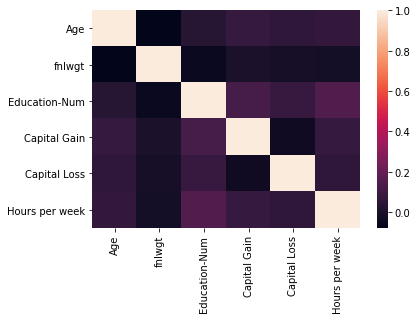

In [39]:
corr = df.corr()
sb.heatmap(corr)

In [40]:
df.corr()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education-Num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital Gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital Loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours per week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


In [41]:
# get dummy variables whose are in categorical type
for name in df.columns:
    if df[name].dtype != "int64":
        df[name] = pd.get_dummies(df[name]) 

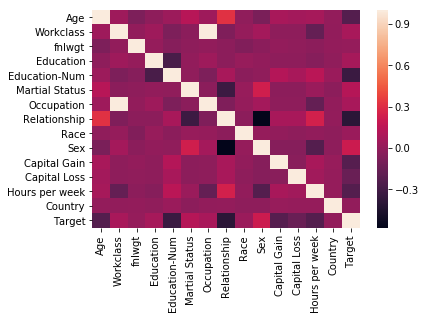

In [42]:
# take correlation between diff features
corr = df.corr()
sb.heatmap(corr)

In [43]:
print (corr['Target'].sort_values(ascending=False)[:15], '\n') #top 15 values
print ('----------------------')
print (corr['Target'].sort_values(ascending=False)[-10:]) #last 5 values`

Target            1.000000
Sex               0.215995
Martial Status    0.127003
Occupation        0.078587
Workclass         0.078203
Education         0.070041
Race              0.028723
fnlwgt            0.009481
Country          -0.003035
Capital Loss     -0.150523
Capital Gain     -0.223333
Hours per week   -0.229690
Age              -0.234039
Education-Num    -0.335182
Relationship     -0.401027
Name: Target, dtype: float64 

----------------------
Education         0.070041
Race              0.028723
fnlwgt            0.009481
Country          -0.003035
Capital Loss     -0.150523
Capital Gain     -0.223333
Hours per week   -0.229690
Age              -0.234039
Education-Num    -0.335182
Relationship     -0.401027
Name: Target, dtype: float64


In [44]:
print("\nDrop unwanted columns")
df = df.drop(['fnlwgt','Race'], axis = 1)
df.head()


Drop unwanted columns


,Age,Workclass,Education,Education-Num,Martial Status,Occupation,Relationship,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,50,0,0,13,0,0,1,0,0,0,13,0,1
1,38,0,0,9,1,0,0,0,0,0,40,0,1
2,53,0,0,7,0,0,1,0,0,0,40,0,1
3,28,0,0,13,0,0,0,1,0,0,40,0,1
4,37,0,0,14,0,0,0,1,0,0,40,0,1


In [45]:
len(df.columns)

13

In [46]:
# str(df)
# df = pd.get_dummies(df)
# df.head()

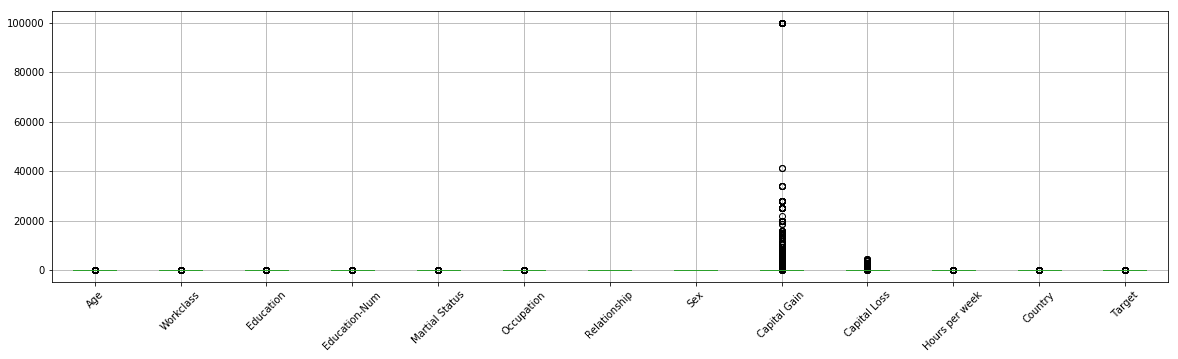

In [47]:
#checck for the outliers
df.boxplot(rot=45, figsize=(20,5))
# sb.boxplot(data = df)
plt.show()

In [48]:
df.shape

(32560, 13)

In [49]:
# def remove_outlier(df):
       
#         low = .05
#         high = .60
#         quant_df = df.quantile([low, high])
#         for name in list(df.columns):
#             if ptypes.is_numeric_dtype(df[name]):
#                 df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
#                 sb.boxplot(df)
# remove_outlier(df)

In [50]:
# df.shape

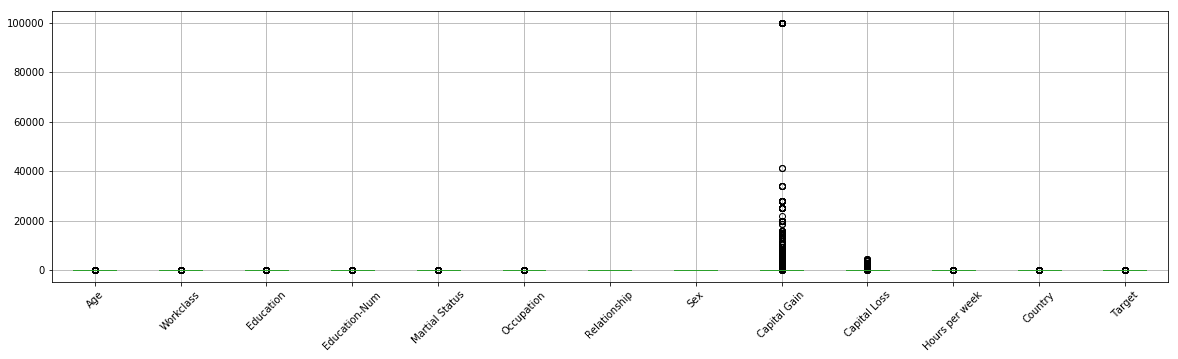

In [51]:
#checck for the outliers
df.boxplot(rot=45, figsize=(20,5))
# sb.boxplot(data = df)
plt.show()

In [52]:
df.shape

(32560, 13)

For targer - mean 0.7591830466830467 , median 1.0 & Skewness is -1.212382935600169


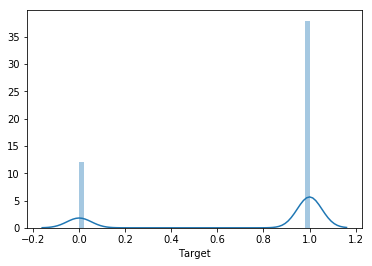

In [53]:
# check skewness for target variable
sb.distplot(df['Target'])
print ("For targer - mean {} , median {} & Skewness is {}"
       .format(df['Target'].mean(), df['Target'].median(),df['Target'].skew()))


Skewness for Target


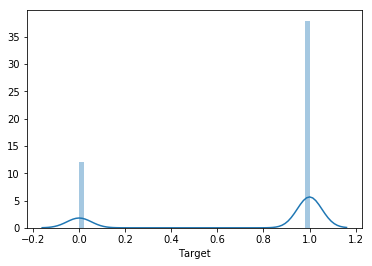

Mean:  0.7591830466830467 Median:  1.0 Skewness is : -1.212382935600169


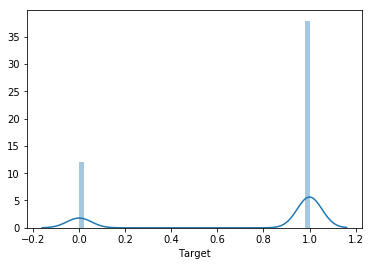

Mean:  0.7593 Median:  1.0 Skewness is : -1.213
Draw histogram


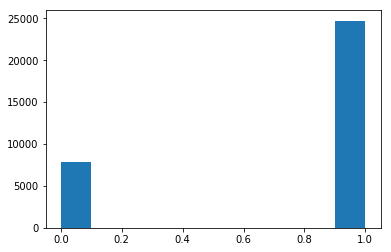

In [54]:
def remove_skew_square():
    print("\nSkewness for Target")
#         df['x2'] = (np.square(df['x2']))
    df['Target'] = (np.square(df['Target']))
    sb.distplot(df['Target'])
    plt.show()
    print("Mean: ",df['Target'].mean(),"Median: ", df['Target'].median(), 'Skewness is :', df['Target'].skew())

    df['Target'] = (np.cbrt(df['Target']))
    sb.distplot(df['Target'])
    plt.show()
    print("Mean: ",df['Target'].mean(),"Median: ", df['Target'].median(), 'Skewness is :', df['Target'].skew())

    print("Draw histogram")
    plt.hist(df['Target'])
    plt.show()
    
remove_skew_square()

In [55]:
def feature_scaling(df):
#     print("\n By Z score Method(Standerdization)  ")
#     df = np.divide((df - df.mean()),df.std())
    for name in df.columns:
        df[name] = (df[name] - df[name].min()) / (df[name].max()-df[name].min())
    print(df.head())
feature_scaling(df)

        Age  Workclass  Education  Education-Num  Martial Status  Occupation  \
0  0.452055        0.0        0.0       0.800000             0.0         0.0   
1  0.287671        0.0        0.0       0.533333             1.0         0.0   
2  0.493151        0.0        0.0       0.400000             0.0         0.0   
3  0.150685        0.0        0.0       0.800000             0.0         0.0   
4  0.273973        0.0        0.0       0.866667             0.0         0.0   

   Relationship  Sex  Capital Gain  Capital Loss  Hours per week  Country  \
0           1.0  0.0           0.0           0.0        0.122449      0.0   
1           0.0  0.0           0.0           0.0        0.397959      0.0   
2           1.0  0.0           0.0           0.0        0.397959      0.0   
3           0.0  1.0           0.0           0.0        0.397959      0.0   
4           0.0  1.0           0.0           0.0        0.397959      0.0   

   Target  
0     1.0  
1     1.0  
2     1.0  
3     1.

In [56]:
# seperate data set
def features(df):
    y_new = df.Target
#     y.head()
    df = df.drop('Target', axis = 1)
    print("Seperate Target column from dataset")
    return df, y_new
df, y_new = features(df)

Seperate Target column from dataset


In [57]:
print('Head for df')
df.head(4)

Head for df


,Age,Workclass,Education,Education-Num,Martial Status,Occupation,Relationship,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,0.452055,0.0,0.0,0.800000,0.0,0.0,1.0,0.0,0.0,0.0,0.122449,0.0
1,0.287671,0.0,0.0,0.533333,1.0,0.0,0.0,0.0,0.0,0.0,0.397959,0.0
2,0.493151,0.0,0.0,0.400000,0.0,0.0,1.0,0.0,0.0,0.0,0.397959,0.0
3,0.150685,0.0,0.0,0.800000,0.0,0.0,0.0,1.0,0.0,0.0,0.397959,0.0


In [58]:
print('Head for df')
y_new.head()

Head for df


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Target, dtype: float16

In [59]:
def split_data(df):
    # 70 % training datset
    train_per = int(0.70*len(df))
    print("Train dataset:", train_per)
    # 30% test dataset
    test_per = len(df)-train_per
    print("Test dataset:", test_per)
    
    print("\nConvert pandas datafrem into numpy")
    x_train_data = np.array(df[:train_per])   
    x_test_data  = np.array(df[:test_per])
    
    
    train_per_y = int(0.70*len(y_new))
    test_per_y = len(y_new)-train_per_y

    
    y_train_data = np.array(y_new[:train_per_y])
    y_test_data = np.array(y_new[:test_per_y])
    
    #reshpe (1357,) to (1357,1) for train and test dataset
    y_test_data = y_test_data.reshape(-1,1)
    y_train_data = y_train_data.reshape(-1,1)
        
    
    print("\nX train data shape:", x_train_data.shape)
    print("y train data shape:", y_train_data.shape)
    print("\nX test data shape:", x_test_data.shape)
    print("y test data shape:", y_test_data.shape)

    return x_train_data, y_train_data, x_test_data, y_test_data

x_train_data, y_train_data, x_test_data, y_test_data = split_data(df)        

Train dataset: 22792
Test dataset: 9768

Convert pandas datafrem into numpy

X train data shape: (22792, 12)
y train data shape: (22792, 1)

X test data shape: (9768, 12)
y test data shape: (9768, 1)


In [64]:
class Logistic:
    def __init__(self):
        # Learning Rate
        self.l_rate = 0.060

        # Total iterations
        self.epoch = 60000
        
    def gradient_descent(self, x_data_train, y_data_train, theta_vector):       
        print("X train & Y train & theta vector", x_data_train.shape, y_data_train.shape, theta_vector.shape)
        for i in range(self.epoch):
            z = np.dot(x_data_train, theta_vector)
            sigmoid = (1 / (1 + np.exp(-z)))
            a = sigmoid - y_data_train
            temp = np.dot( x_data_train.T, a)
            temp = np.dot(temp, self.l_rate) / len(x_data_train)
            theta_vector = theta_vector - temp
            
            temp1 = np.dot(y_train_data.T, np.log(sigmoid))  #(1, 3164)
            temp2 = np.dot((1 - y_train_data.T),np.log(np.abs(1- sigmoid)))  # (1, 3164)
#                         temp2 = np.multiply((1 - y_train_data.T),np.log(np.abs(1- sigmoid)))  # (1, 3164)

            cost = temp1 + temp2
            
        print("\n\nhypo_multiplication shape",z.shape)
        print("sigmoid shape", sigmoid.shape)
        print("error shape", a.shape)
        print("temp", temp.shape)
        
        print("theta shape", theta_vector.shape)
        
#         print("\nTemp1 shape:", temp1.shape)
#         print("Temp2 shape:", temp2.shape)
#         print("Cost shape:", cost.shape)
        
        return theta_vector

    def prediction(self, x_data_test, theta_vector):
        print("\n Prediction function")
        print("x : theta",x_data_test.shape, theta_vector.shape )
              
        y_prediction = np.zeros((x_data_test.shape[0], 1), dtype=float)
        print("y_prediction:",y_prediction.shape)
#         x_data_test = np.column_stack((np.ones((x_data_test.shape[0], 1)), x_data_test))
        z = np.dot(x_data_test, theta_vector)
        sigmoid = np.array(1 / (1 + np.exp(-z)))

        for i in (range(0, len(sigmoid))):
            if round(sigmoid[i][0], 2) <= 0.5:
                y_prediction[i][0] = 0
            else:
                y_prediction[i][0] = 1
#         print("final shape......", y_prediction.shape)
#         y_prediction = np.reshape(y_prediction, (len(y_prediction), 1))
#         print("final shape", y_prediction.shape)
        return y_prediction

    def theta_0_vs_iterations(self, cost_fun, theta, size):
            for j in range(0,size):
                print("for values from", j)
                x = [theta[i+(self.echops)*j] for i in range(len(cost_fun))]
                print("c_f",cost_fun.shape)
                print("theta",theta.shape)

                y = [cost_fun[i] for i in range(len(cost_fun))]
                plt.plot(x,y)
                plt.show()
                
    def test_vs_predict(self, x_test_data, y_test_data, y_predict):
        plt.title("x_test vs vs y_test vs y_predicted")
        plt.xlabel("x_test")
        plt.ylabel("y_test")
        x = [x_test_data[0:] for i in range(len(x_test_data))]
        y = [y_test_data[i] for i in range(len(x_test_data))]
        z = [y_predict[i] for i in range(len(y_predict))]
        print(len(x), len(y))
        plt.scatter(x, y, alpha=0.5)
        plt.plot(x,z, c = "purple")
        plt.show()

#     def accuracy(self, y_data_test, y_pred_test):
#         total_error = 0
#         error = []
#         for i in range(0, len(y_data_test)):
#             total_error = total_error + abs((y_pred_test[i] - y_data_test[i]) / y_data_test[i])
#         total_error = (total_error / len(y_data_test))
#         accuracy = 1 - total_error
#         return accuracy * 100
    


def main(df, x_train_data, y_train_data, x_test_data,y_test_data ):
    # class obj created
    

    obj = Logistic()
    
    
    print("X train shape original", x_train_data.shape)
    
    x_col = 12
    theta_vector = np.full((x_col +1 ,1), 0.05)
#     theta_vector = np.zeros(((x_col + 1), 1), dtype='f')
   
    # append new col bcoz we have 6 features as, x1,x2,....x6 but 7 thetas so add new x(np.opnes)
    # unction is used to stack 1-D arrays as columns into a 2-D array
    # Stacking the two arrays   
    x_train_data = np.column_stack((np.ones((x_train_data.shape[0], 1)), x_train_data))
    print("x train data .....", x_train_data.shape)
    x_test_data = np.column_stack((np.ones((x_test_data.shape[0], 1)), x_test_data))

    theta = obj.gradient_descent(x_train_data, y_train_data, theta_vector)
    print(theta.shape)
    #y prediction 
    y_test_prediction = obj.prediction(x_test_data, theta)
#     print("........x test data", x_test_data.shape)
  
    y_train_prediction = obj.prediction(x_train_data, theta)

    
    print("\n\nAccuracy : ")
    train_acc = round(float(100 - np.mean(np.abs(y_train_prediction - y_train_data)) * 100))
    test_acc = round(float(100 - np.mean(np.abs(y_test_prediction - y_test_data)) * 100))
    print("Train dataset accuracy: ", train_acc, "Test dataset accuracy:", test_acc)
#self.l_rate = 0.001  .........ad-self.epoch = 60000Train dataset accuracy:  77 Test dataset accuracy: 77
#     obj.test_vs_predict(x_test_data, y_test_data, y_test_prediction)
    
main(df, x_train_data,y_train_data,x_test_data,y_test_data)


X train shape original (22792, 12)
x train data ..... (22792, 13)
X train & Y train & theta vector (22792, 13) (22792, 1) (13, 1)


hypo_multiplication shape (22792, 1)
sigmoid shape (22792, 1)
error shape (22792, 1)
temp (13, 1)
theta shape (13, 1)
(13, 1)

 Prediction function
x : theta (9768, 13) (13, 1)
y_prediction: (9768, 1)

 Prediction function
x : theta (22792, 13) (13, 1)
y_prediction: (22792, 1)


Accuracy : 
Train dataset accuracy:  83 Test dataset accuracy: 83
